# Stroke Prediction


- **Background:** Stroke is an interruption of blood flow to the brain when the blood supply to part of your brain is interrupted or reduced. An occurs when a clot or mass blocks a blood vessel, cutting off blood flow to a part of the brain. A stroke is a medical emergency, and prompt treatment is crucial. Early action can reduce brain damage and other complications.

  **Our objective** is to understand what are the reasons that cause stroke to peoeple and see if we can succefully detect stroke on some 
  
  Finding the etiology of your stroke and secondary stroke risk factors is critical because it allows your doctor to create a plan that is unique to you in order to prevent another stroke.






**What cause a stroke**        |  **How to detect a stroke**
:-------------------------:|:-------------------------:
![](https://www.lifetrendshop.com/wp-content/uploads/2019/10/HTN_16_pg39_art600x400.png)  |  ![](https://y7ahf1nill81o83wy796cnuw-wpengine.netdna-ssl.com/wp-content/uploads/2019/05/2019_may_infographic_stroke_fast.jpg)

The World Health Organization estimates that 12 million deaths occur worldwide every year due to heart disease. Half of the fatalities in the United States and other developing nations was attributed to cardiovascular disease. Clear prognosis of stroke disorders may help us inform decisions regarding dietary improvements in high-risk patients which, in addition, mitigate risks. If the partnership is about to be established and the conditions that impact it can be remedied in advance.


**Problem Statement**: Visululize relationships between the characteristics and activities of healthy that unhealthy patients. The optimal model and hypertuned parameters were used to predict the risk of stroke.

**The feature list and the target 12 variables:**


1.   id: unique identifier
2.   gender: "Male", "Female" or "Other"
3.   age: age of the patient
4.   hypertension: 

   - 0 if the patient doesn't have hypertension
   - 1 if the patient has hypertension


5.   heart_disease: 

   - 0 if the patient doesn't have any heart diseases
   - 1 if the patient has a heart disease

6.  ever_married: "No" or "Yes"

7.   work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8.   Residence_type: "Rural" or "Urban"

9.   avg_glucose_level: average glucose level in blood

10.  bmi: body mass index

11.  smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12.  stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" Column smoking_status: หมายถึงไม่มีข้อมูลผู้ป่วย 

Reference: https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

# **Importing Libraries** <a id="1"></a>

## Dataset: content/stroke-prediction-dataset from kaggle.com
Since this file is 150 MB in size, for a fast download we will go directly to the website to download it by going to Kaggle [kaggle.com](https://www.kaggle.com/)
1. login Kaggle by Gmail Account 
2. go to Account
3. API (Application Program Interface) To download the kaggle.json file and save it for upload to CoLab, click Create New API Token from your Kaggle account.


In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Uploading files from your local file system**

`files.upload` returns a dictionary of the files which were uploaded.
The dictionary is keyed by the file name and values are the data which were uploaded.

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 72 bytes


In [ ]:
!kaggle datasets download "fedesoriano/stroke-prediction-dataset"

  0% 0.00/67.4k [00:00<?, ?B/s]
100% 67.4k/67.4k [00:00<00:00, 34.3MB/s]


In [ ]:
!unzip /content/stroke-prediction-dataset.zip

Archive:  /content/stroke-prediction-dataset.zip
  inflating: healthcare-dataset-stroke-data.csv  


In [ ]:
## install library help to auto EDA
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
!pip install pyyaml==5.4.1
exit()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 21.8 MB 60.6 MB/s 
     |████████████████████████████████| 11.1 MB 4.6 MB/s 
     |████████████████████████████████| 596 kB 45.5 MB/s 
     |████████████████████████████████| 102 kB 48.9 MB/s 
     |████████████████████████████████| 690 kB 38.8 MB/s 
     |████████████████████████████████| 4.7 MB 40.7 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
     |████████████████████████████████| 812 kB 51.1 MB/s 
     |████████████████████████████████| 38.1 MB 19.1 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.2.0-py2.py3-none-any.whl size=262599 sha256=02d269c1bdef0df2e815772280686627542758a2dcd595d7522a444d7a901bb5
  Stored in directory: /tmp/pip-ephem-wheel-cache-xj4ldy1u/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=270

**Import Library**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
# Lable encoding
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

# **Exploratory data analysis: EDA**
Exploratory Data Analysis (EDA) is an approach to analyze the data using visual techniques. It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations. 


Exploratory Data Analysis is an audit process or explore the basics It is the necessary data analysis before using the data. Alternatively, it can be utilized for insight analysis. The advantages of EDA assist us in comprehending the fundamentals of that data set, as well as exploring the missing value and imperfection of the data set.



**Data understanding**

1. Import Dataset: healthcare-dataset-stroke-data

In [ ]:
dataset = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

In [ ]:
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


2. Concise summary of the dataframe.

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
dataset.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

Explor missing value by `dataset.isnull().sum()` in dataset:  column bmi has null values are 201

In [ ]:
dataset.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

**Missing Value treatment**


*   Replace the null value of 'bmi' with the mean of column bmi.





In [ ]:
dataset.bmi.mean()

28.893236911794673

In [ ]:
dataset.bmi.replace(to_replace=np.nan, value=dataset.bmi.mean(), inplace=True)

In [ ]:
dataset.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

**Drop irrelevant column: id**

In [ ]:
# drop id column
dataset= dataset.drop(columns=['id'])

dataset.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


Use `dataset.describe()` for calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame.

In [ ]:
dataset.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


**Find the pairwise correlation of all columns in the dataframe.**

  age / hypertension /	heart_disease /	avg_glucose_level / bmi in stroke

In [ ]:
dataset.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.325942,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.160189,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.038899,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.168751,0.131945
bmi,0.325942,0.160189,0.038899,0.168751,1.000000,0.038947
stroke,0.245257,0.127904,0.134914,0.131945,0.038947,1.000000


# **Exploratory data analysis: EDA** <a id="3"></a>

**Visualization**

**Gender**

Observation showed that female patients 2994 and male patients 2115.

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


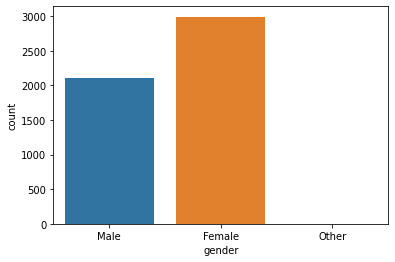

In [ ]:
print(dataset.gender.value_counts())
# sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="gender")
plt.show()

**Hypertension** 

Observation of data shows 498 patients with hypertension out of 5110 patients.


0    4612
1     498
Name: hypertension, dtype: int64


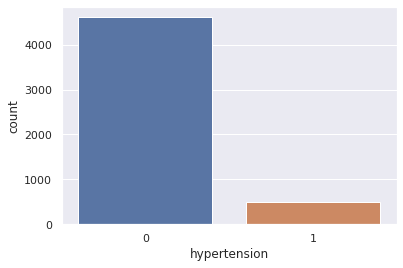

In [ ]:
print(dataset.hypertension.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="hypertension")
plt.show()

**Marriage Status**

Observation of data shows  3353 married and 1757 unmarried patients, the ratio was 2:1.


Yes    3353
No     1757
Name: ever_married, dtype: int64


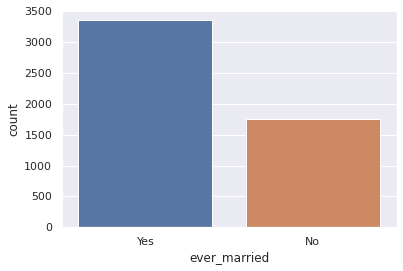

In [ ]:
print(dataset.ever_married.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="ever_married")
plt.show()



**Work Type**

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


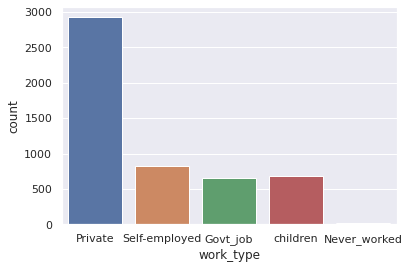

In [ ]:
print(dataset.work_type.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="work_type")
plt.show()

**Residence Type** 

Observation of data the patient  was found that there were 2596 urban residents and 2514 urban outpatients in equal proportions.

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


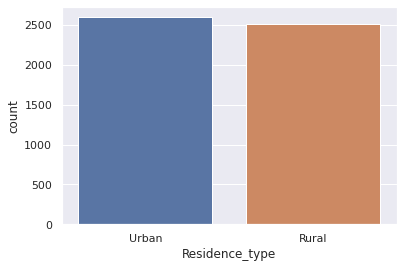

In [ ]:
print(dataset.Residence_type.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="Residence_type")
plt.show()

**Smoking Status** <a id="3.2.6"></a>

Including: never smoked 1892, Unknown 1544, formerly smoked 885 and smokes 789

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


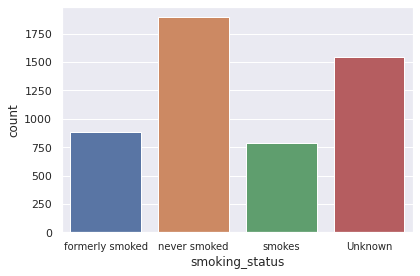

In [ ]:
print(dataset.smoking_status.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="smoking_status")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
plt.tight_layout()
plt.show()

**Stroke:** 
Observation of patient data found that there were 249 out of 5110 patients with cerebrovascular disease, which found that today there are significantly fewer people with cerebrovascular disease. From the information obtained,  the data group had no balance of data, according to the information obtained. As a result, the data must be  Imbalance data using SMOTE.

0    4861
1     249
Name: stroke, dtype: int64


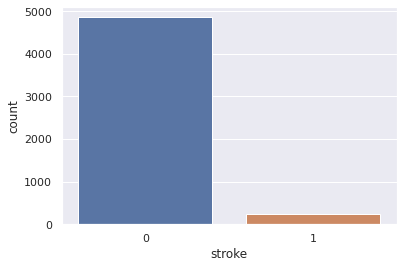

In [ ]:
print(dataset.stroke.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="stroke")
plt.show()

**Distribution Plot**

**Avg. Glucose Level**

Plot graph looks at the density and distribution of the "Avg. Glucose Level" data.

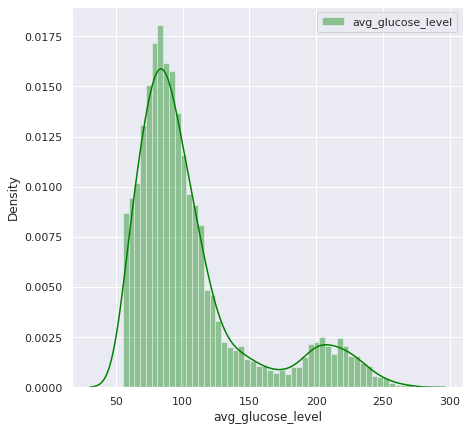

In [ ]:
fig = plt.figure(figsize=(7,7))
sns.distplot(dataset.avg_glucose_level, color="green", label="avg_glucose_level", kde= True)
plt.legend()

from the graph above It is divided into 3 parts as follows:

1. The normal blood sugar level in adults should be about 80-140, which is very dense in this range is normal. Therefore, it can be seen that many people with normal sugar levels are not diabetic.

2. The range of sugar levels from 140-200 is considered a pre-diabetes condition. But when looking at the graph, there are fewer dense people in this range.

3. If the range of sugar levels more than 200 will see that the patient has diabetes. The density is greater compared to pre-diabetes as seen in the graph above.

**Body mass index (BMI)**

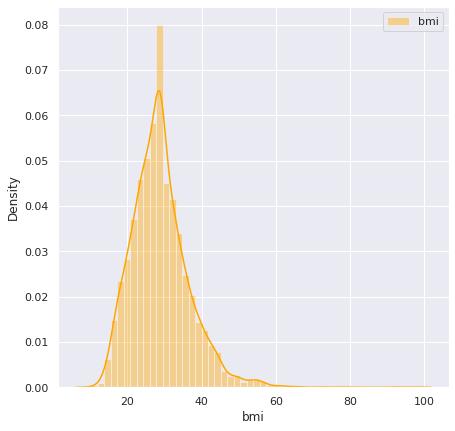

In [ ]:
fig = plt.figure(figsize=(7,7))
sns.distplot(dataset.bmi, color="orange", label="bmi", kde= True)
plt.legend()

from the graph above It is divided into 3 parts as follows:

1. BMI below 19 can be seen as underweight, which can be seen from the graph, the underweight population is few dense graph.

2. BMI between 19-25 can be seen as normal weight where the normal weight population has a fairly dense graph.

3. BMI above 25 can be seen because the person is overweight or obese. The graph shows that the density is higher than the normal BMI.

**Age**

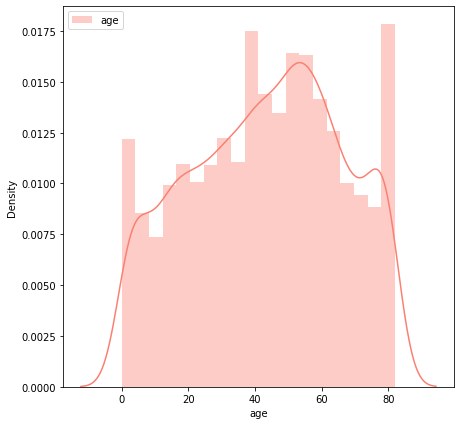

In [ ]:
fig = plt.figure(figsize=(7,7))
sns.distplot(dataset.age, color="salmon", label="age", kde= True)
plt.legend()

Age ranges from 0.08 to 82 years. 

age of the majority of adult patients is 40 years or older, with a very high density in this graph.

In [ ]:
def plot_hist(col, color="", bins=30, title="",xlabel="", kde= True, ax=None):
    sns.distplot(col, bins=bins, kde= True, ax=ax)
    ax.set_title(f'Histogram of {title}',fontsize=20)
    ax.set_xlabel(xlabel)

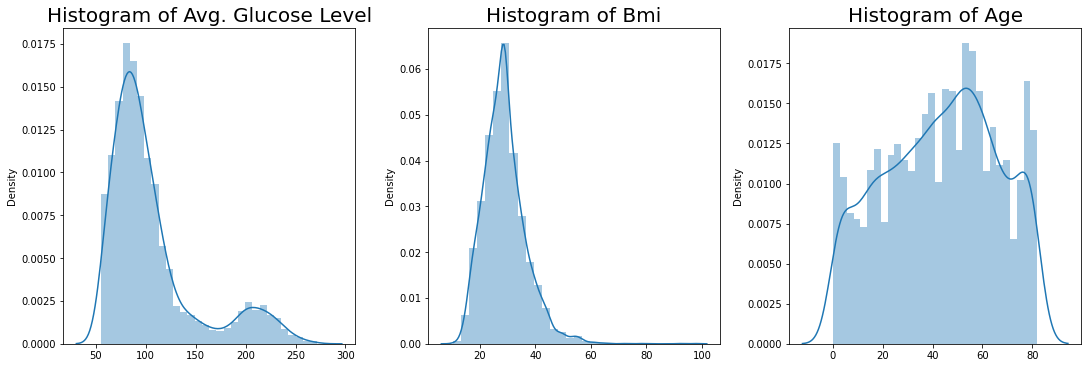

In [ ]:
fig, axes = plt.subplots(1,3,figsize=(15,5),constrained_layout=True)
plot_hist(dataset.avg_glucose_level,
          color = 'orange',
          title = 'Avg. Glucose Level',
          ax=axes[0])
plot_hist(dataset.bmi,
          color = 'green',
          title='Bmi',
          ax=axes[1])
plot_hist(dataset.age,
          color = 'salmon',
          title='Age',
          ax=axes[2])

**Using BMI to compare data from persons who haven't had a stroke to people who have had a stroke**

It was discovered that there were considerably fewer stroke patients in this sample. This is due to the fact that the data set is imbalanced.

The data obtained therefore found that the data group had no balance of data. Therefore, the data must be balanced.

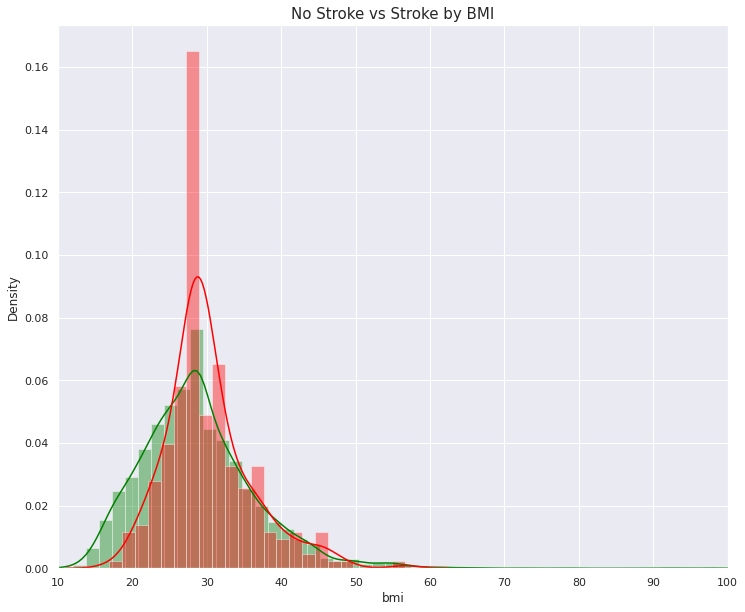

In [ ]:
plt.figure(figsize=(12,10))

sns.distplot(dataset[dataset['stroke'] == 0]["bmi"], color='green') # No Stroke - green
sns.distplot(dataset[dataset['stroke'] == 1]["bmi"], color='red') # Stroke - Red

plt.title('No Stroke vs Stroke by BMI', fontsize=15)
plt.xlim([10,100])
plt.show()

**Using Gvg_glucose_level to compare data from persons who haven't had a stroke to people who have had a stroke**

The graph shows that people with blood sugar levels below 100 are more likely to suffer a stroke.

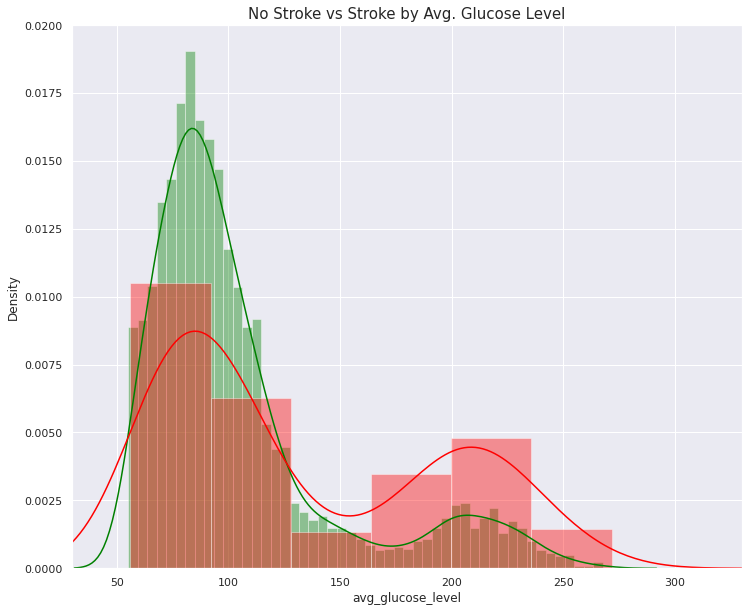

In [ ]:
plt.figure(figsize=(12,10))

sns.distplot(dataset[dataset['stroke'] == 0]["avg_glucose_level"], color='green') # No Stroke - green
sns.distplot(dataset[dataset['stroke'] == 1]["avg_glucose_level"], color='red') # Stroke - Red

plt.title('No Stroke vs Stroke by Avg. Glucose Level', fontsize=15)
plt.xlim([30,330])
plt.show()

**Using age of patient to compare data from persons who haven't had a stroke to people who have had a stroke**

The graph shows that patients over the age of 50 are more likely to have a stroke.

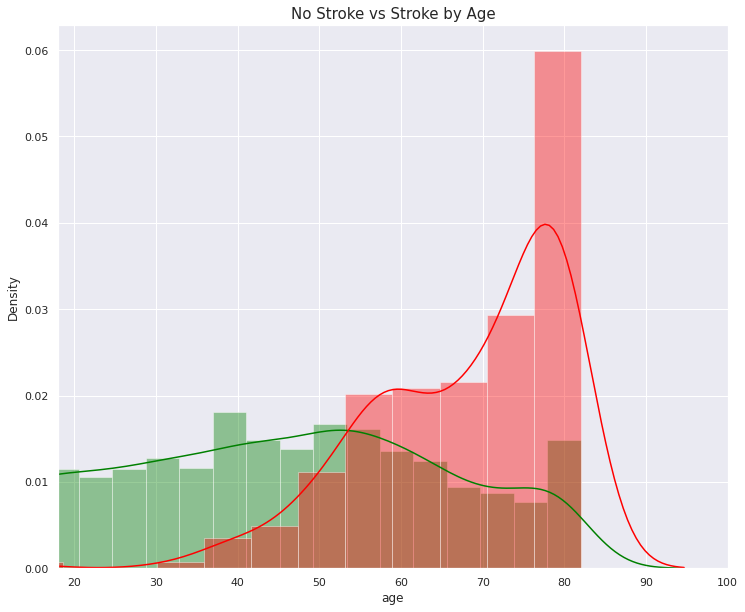

In [ ]:
plt.figure(figsize=(12,10))

sns.distplot(dataset[dataset['stroke'] == 0]["age"], color='green') # No Stroke - green
sns.distplot(dataset[dataset['stroke'] == 1]["age"], color='red') # Stroke - Red

plt.title('No Stroke vs Stroke by Age', fontsize=15)
plt.xlim([18,100])
plt.show()

**Scter Plot**

**The relationship between age and body mass index (BMI).**

Many patients with a BMI more than 25 are overweight and have an impact on obesity, as seen in the graph.

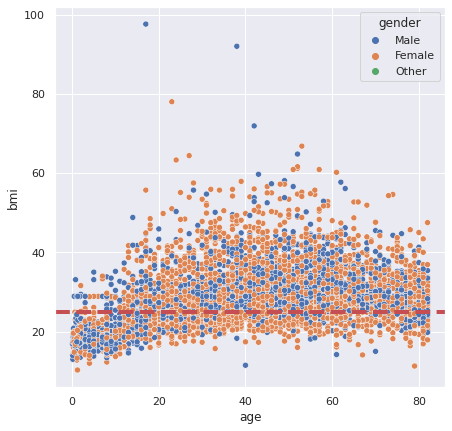

In [ ]:
fig = plt.figure(figsize=(7,7))
graph = sns.scatterplot(data=dataset, x="age", y="bmi", hue='gender')
graph.axhline(y= 25, linewidth=4, color='r', linestyle= '--')
plt.show()

**The relationship between age and average glucose level.**

From the graph, it can be seen that patients with a glucose greater than 150 have a comparatively lower percentage of the graph below. As a result, a patient with a glucose level greater than 150 can be diagnosed as diabetic.

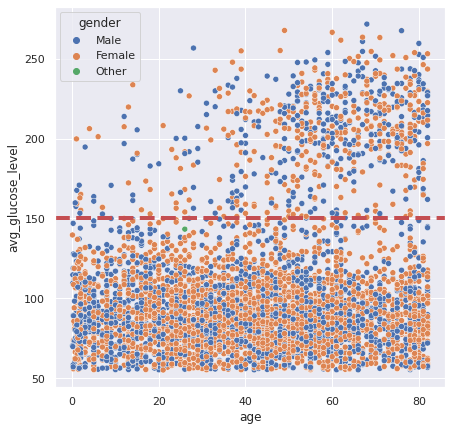

In [ ]:
fig = plt.figure(figsize=(7,7))
graph = sns.scatterplot(data=dataset, x="age", y="avg_glucose_level", hue='gender')
graph.axhline(y= 150, linewidth=4, color='r', linestyle= '--')
plt.show()

**Violin Plot**

Violin Plot is a hybrid of a box plot and a kernel density plot, which shows peaks in the data. It is used to visualize the distribution of numerical data.

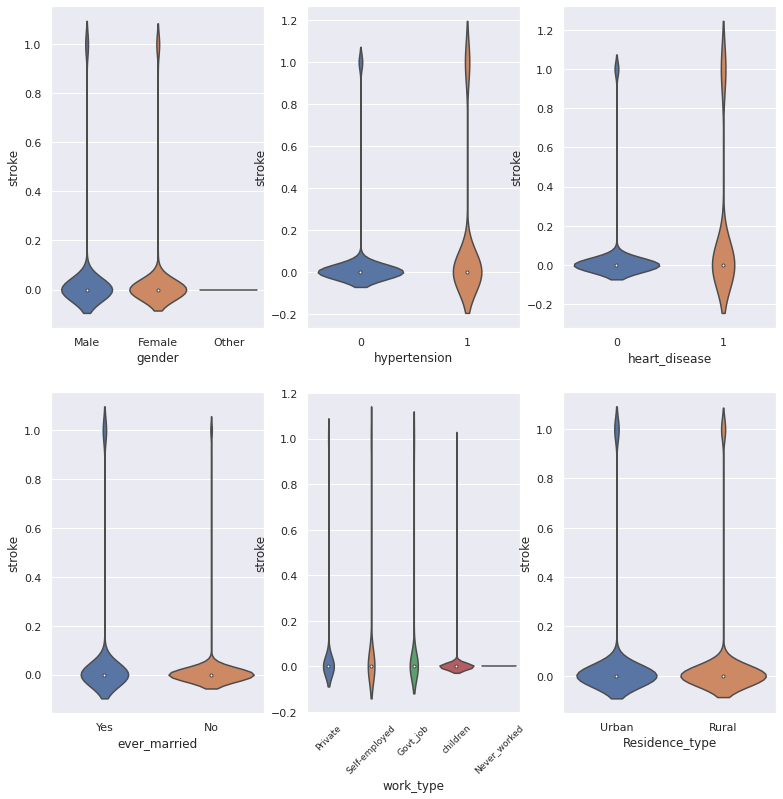

In [ ]:
plt.figure(figsize=(13,13))
sns.set_theme(style="darkgrid")
plt.subplot(2,3,1)
sns.violinplot(x = 'gender', y = 'stroke', data = dataset)
plt.subplot(2,3,2)
sns.violinplot(x = 'hypertension', y = 'stroke', data = dataset)
plt.subplot(2,3,3)
sns.violinplot(x = 'heart_disease', y = 'stroke', data = dataset)
plt.subplot(2,3,4)
sns.violinplot(x = 'ever_married', y = 'stroke', data = dataset)
plt.subplot(2,3,5)
sns.violinplot(x = 'work_type', y = 'stroke', data = dataset)
plt.xticks(fontsize=9, rotation=45)
plt.subplot(2,3,6)
sns.violinplot(x = 'Residence_type', y = 'stroke', data = dataset)
plt.show()

**Pair Plot**

The default pairs plot is a tool to find patterns, correlations, or anomalies to inform analysis. The most effective starter model is the Pairs Plot (also known as the Scatterplot matrix). The Pairs Plot allows both the distribution of a single variable and the relationship between two variables.

<Figure size 720x720 with 0 Axes>

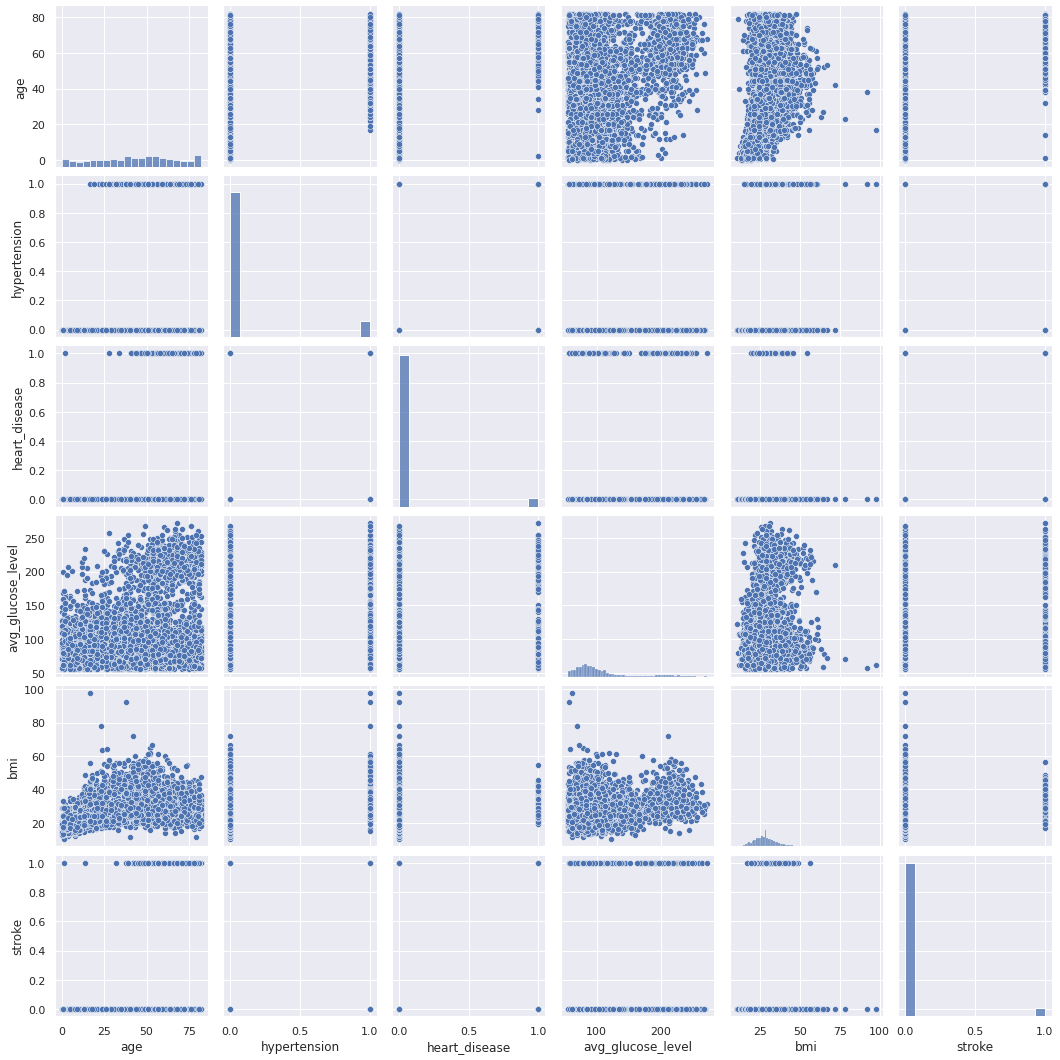

In [ ]:
fig = plt.figure(figsize=(10,10))
sns.pairplot(dataset)
plt.show()

**Lable encoding** 

Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

In [ ]:
#  Using Lable encoding
class_le = LabelEncoder()
dataset1 = dataset.apply(class_le.fit_transform)


**Correlation**
Correlation is a statistical term describing the degree to which two variables move in coordination with one another. A correlation coefficient is a number between -1 and 1 that tells you the strength and direction of a relationship between variables. The positive value is variable correlation is called Positive Correlation and the negative value is inversely correlated is called Negative Correlation.

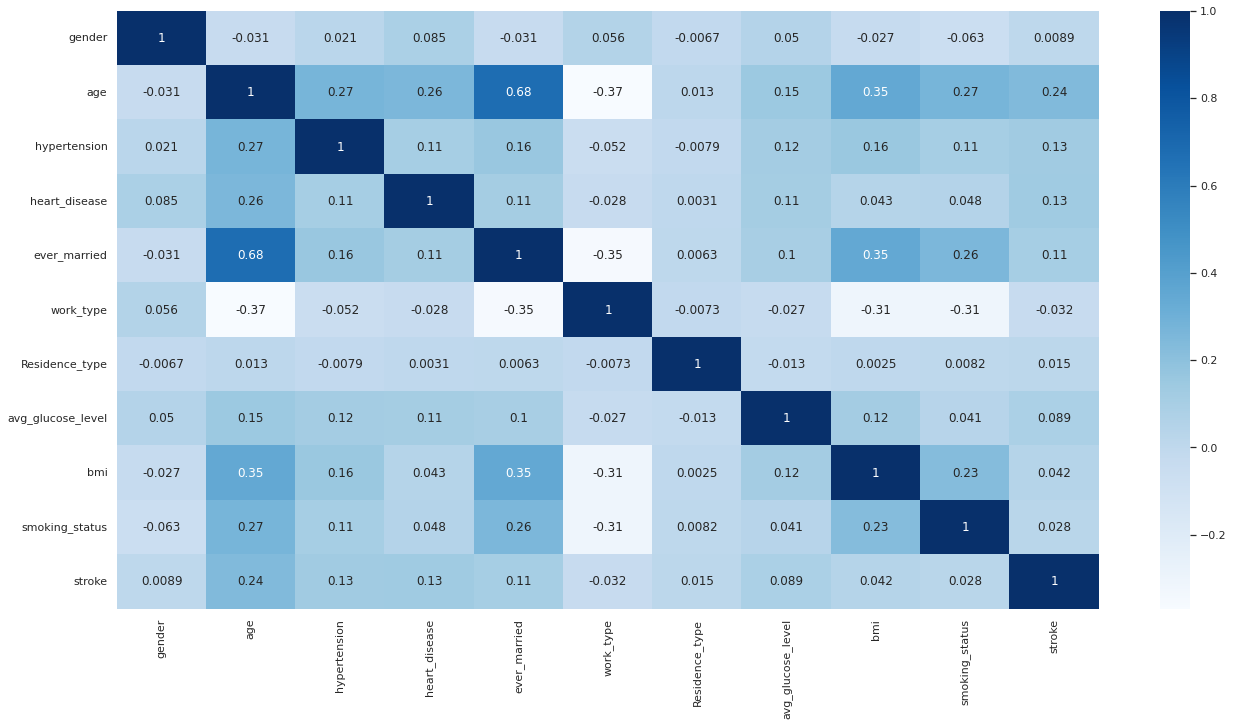

In [ ]:
plt.figure(figsize=(22,11))
sns.heatmap(dataset1.corr(),cmap='Blues',annot=True);

Get to know the data (EDA) at an early stage using automated tools. **Pandas_Profiling**


In [ ]:
import pandas_profiling

#descriptive statistics
pandas_profiling.ProfileReport(dataset)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# **Outlier treatment**
An outlier is an observation of a data point that lies an abnormal distance from other values in a given population. 

From the figure below, when taking the data set to do Boxplot, you can see that there are a lot of Outliers.



**Boxplot** is a graph that gives you a good indication of how the values in the data are spread out.  Boxplot is useful when comparing distributions between many groups or datasets. 

**Boxplots** are a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”).

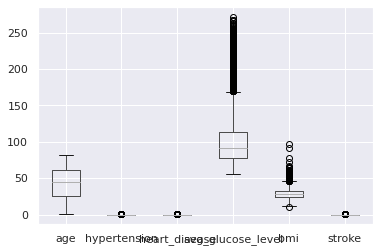

In [ ]:
plt.figure(figsize=(22,11))
%matplotlib inline
dataset.boxplot()

<h1 style="color:white;background-color:black;font-family:Georgia;font-size:350%;text-align:center">IQR method: bmi</h1>


* BMI ranges from 18.5 to 49.9

The graph shows that a BMI above 50 is a large outliner, it quite a lot.



![](https://i.postimg.cc/kgd3LTBT/ae4498b42e31d75d05e764105a9e981a.jpg)

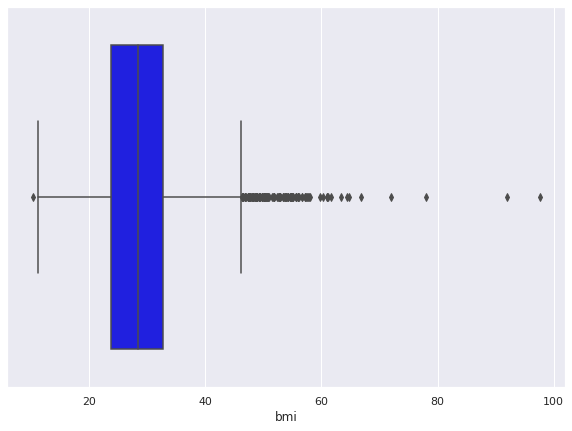

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(data=dataset,x=dataset['bmi'],color='blue');

**Outliers Treatment** : calcuated IQR 
* Lower Limit of bmi = 10.30 
* Upper Limit of bmi = 46.29 

In [ ]:
    Q1 = dataset['bmi'].quantile(0.25)
    Q3 = dataset['bmi'].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit_bmi=Q1 - 1.5 * IQR
    upper_limit_bmi=Q3 + 1.5 * IQR

    print('lower_limit Bmi: ', lower_limit_bmi)
    print('upper_limit Bmi: ', upper_limit_bmi)

lower_limit Bmi:  10.300000000000006
upper_limit Bmi:  46.29999999999999


In [ ]:
# lower_limit 21.977500000000006
dataset['bmi']= dataset['bmi'].apply(lambda x: lower_limit_bmi if x<lower_limit_bmi else x)

# upper_limit 169.35750000000002
dataset['bmi']= dataset['bmi'].apply(lambda x: upper_limit_bmi if x>upper_limit_bmi else x)



**Recheck Outlier**

Dataset column bmi: boxplot 


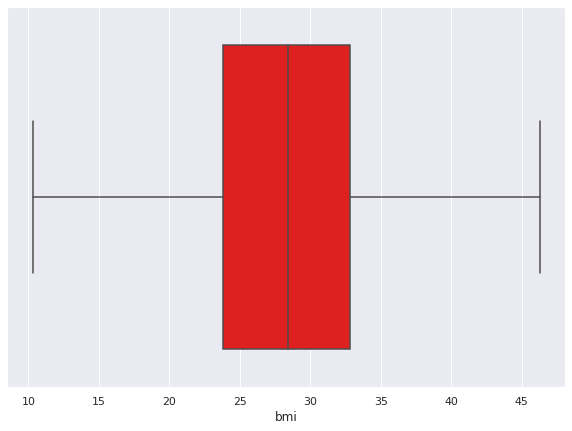

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(data=dataset,x=dataset['bmi'],color='red');

# **Processing Data**

Data preprocessing is the process of transforming raw data into an understandable format. Getting data set ready for use with the Machine Learning Model goes through the following process:

* Split dataset between Train and Test
* Lable encoding converts catagory data to different values ​​using the old column.
* Normalization and Transfom by using RobustScaler

In [ ]:
#  Using Lable encoding
class_le = LabelEncoder()
dataset = dataset.apply(class_le.fit_transform)

In [ ]:
from sklearn.model_selection import train_test_split
X=dataset.drop(columns=['stroke'],axis=1)
y=dataset['stroke'].values

# ไม่ยุ่งกับข้อมูลชุด test ใช้งานจริงเท่านั้น
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=50)

**Normalization and Transform**

In [ ]:
from sklearn.preprocessing import RobustScaler
scale = RobustScaler().fit(X_train)
X_train=scale.transform(X_train)
X_test=scale.transform(X_test)

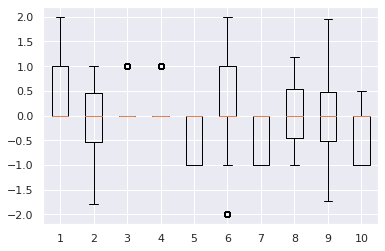

In [ ]:
boxplot = plt.boxplot(X_train)

## **Imbalance data using SMOTE**

Classification Algorithms: Classification get better results are obtained when the number of datasets for each group is equal. If the dataset is highly skewed, i.e. the number of individual datasets has a very different quantity, or it may be called imbalanced.

The challenge of working with **imbalanced datasets** is that most machine learning techniques will ignore, and in turn have poor performance on, the minority class, although typically it is performance on the minority class that is most important.

**Solution:** The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or SMOTE for short.

**Lmbalance type Over-sampling** 

Randomly increase the number of minority data (Minor:Stroke class) up to the same as Major: Non-Stroke class

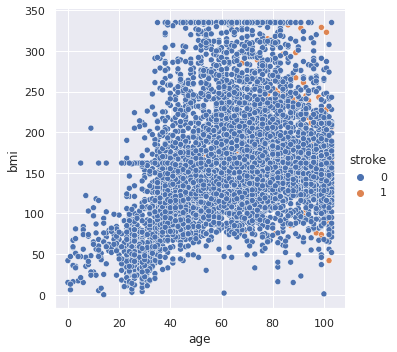

In [ ]:
sns.relplot(data=dataset, x='age', y='bmi', hue='stroke');

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 184
Before OverSampling, counts of label '0': 3393 

After OverSampling, the shape of train_X: (6786, 10)
After OverSampling, the shape of train_y: (6786,) 

After OverSampling, counts of label '1': 3393
After OverSampling, counts of label '0': 3393


Dataset after imbalance data using Synthetic Minority Oversampling Technique (SMOTE), adding class data with 50:50 ratio of data set.

In [ ]:
(unique, counts) = np.unique(y_train_res, return_counts=True)
counts

array([3393, 3393])

In [ ]:
y_train_res.shape

(6786,)

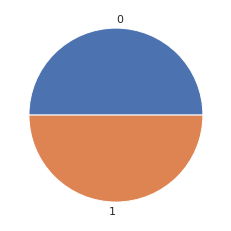

In [ ]:
plt.pie(counts, labels = unique)
plt.show()

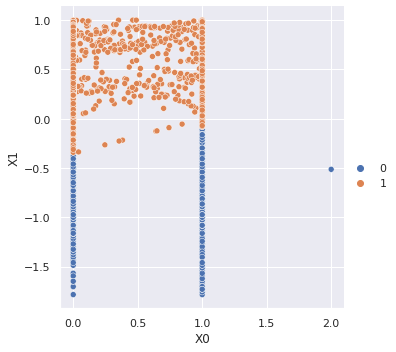

In [ ]:
ax=sns.relplot(x=X_train_res[:,0], y=X_train_res[:,1], hue=y_train_res);
ax.set(xlabel='X0', ylabel='X1')

# **Model training and evaluation**

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score

## **Model training and evaluation: Logistic Regreesion**

**Logistic regression**is a statistical analysis method to predict a binary outcome, such as yes or no, 0 and 1, based on prior observations of a data set.

**Logistic regression** model predicts a dependent data variable by analyzing the relationship between one or more existing independent variables, by that aims to predict the likelihood of an event of interest based on a logistic equation created from a set of predictive variables. These binary outcomes allow straightforward decisions between two alternatives.

In [ ]:
from sklearn.linear_model import LogisticRegression

              precision    recall  f1-score   support

           0       0.99      0.78      0.87      1468
           1       0.13      0.75      0.22        65

    accuracy                           0.78      1533
   macro avg       0.56      0.77      0.55      1533
weighted avg       0.95      0.78      0.84      1533

Accuracy Score:  0.7775603392041748


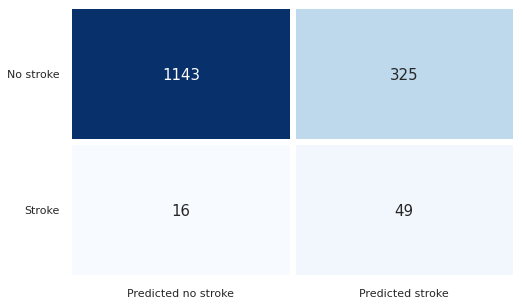

In [ ]:
classifier_linear = LogisticRegression(random_state=0)
classifier_linear.fit(X_train_res, y_train_res)
y_pred = classifier_linear.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()


## **Model training and evaluation: Stochastic Gradient Descent**

**Stochastic gradient descent** is a common algorithm used in various machine learning algorithms and, most importantly, forms the basis of neural networks. In this article, It is derived from the principle of the Train Neural Network Model, using gradients or slopes as a measure of magnitude and direction to adjust parameters that will cause the Loss Value to move to the lowest point of the surface (Minima). Understanding the concept of SGD is essential. It is important to be able to fine-tune the neural network, especially the Deep Learning Model, to be more efficient.

              precision    recall  f1-score   support

           0       0.99      0.78      0.87      1468
           1       0.13      0.75      0.22        65

    accuracy                           0.78      1533
   macro avg       0.56      0.77      0.55      1533
weighted avg       0.95      0.78      0.84      1533

Accuracy Score:  0.7775603392041748


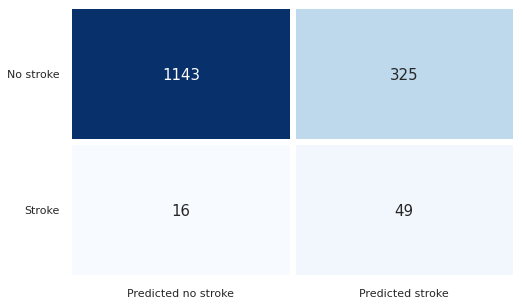

In [ ]:
from sklearn.linear_model import SGDClassifier

sgdc = SGDClassifier(max_iter=5000, random_state=0)
sgdc.fit(X_train_res, y_train_res)
sgdc_predicted = sgdc.predict(X_test)
sgdc_conf_matrix = confusion_matrix(y_test, sgdc_predicted)
sgdc_acc_score = accuracy_score(y_test, sgdc_predicted)

print(classification_report(y_test, y_pred))
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()




## **Model training and evaluation: K-nearest-neighbors**

**K-nearest neighbors algorithm**, also known as KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point. While it can be used for either regression or classification problems, it is typically used as a classification algorithm, working off the assumption that similar points can be found near one another.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

              precision    recall  f1-score   support

           0       0.97      0.85      0.90      1468
           1       0.10      0.37      0.15        65

    accuracy                           0.83      1533
   macro avg       0.53      0.61      0.53      1533
weighted avg       0.93      0.83      0.87      1533

Accuracy Score:  0.8290932811480757


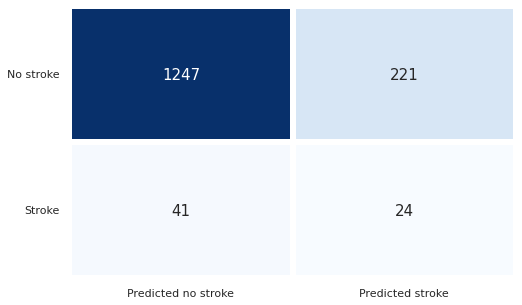

In [ ]:
classifier_knn = KNeighborsClassifier()
classifier_knn.fit(X_train_res, y_train_res)
y_pred = classifier_knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

## **Model training and evaluation: Support-vector machine (SVM)**

**Support-vector machine (SVM)** is an algorithm that can solve data classification problems. It is used to analyze and classify data based on the principle of finding coefficients of equations to create a separating line among the entered data groups. Enter the process of learning the system to learn by focusing on the best lines to distinguish groups of data. SVM can be used for both regression and classification tasks. But, it is widely used in classification objectives.

In [ ]:
from sklearn.svm import SVC

              precision    recall  f1-score   support

           0       0.98      0.81      0.89      1468
           1       0.12      0.60      0.20        65

    accuracy                           0.80      1533
   macro avg       0.55      0.71      0.55      1533
weighted avg       0.94      0.80      0.86      1533

Accuracy Score:  0.8023483365949119


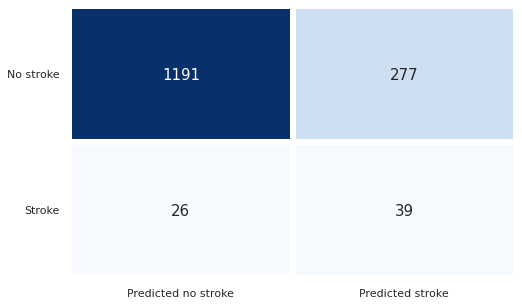

In [ ]:
classifier_svm = SVC(random_state=0, probability=True)
classifier_svm.fit(X_train_res, y_train_res)
y_pred = classifier_svm.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, 
            fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

## **Model training and evaluation: Decision Tree**
**Decision tree** is a flowchart like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label. 

In [ ]:
from sklearn.tree import DecisionTreeClassifier

              precision    recall  f1-score   support

           0       0.96      0.90      0.93      1468
           1       0.09      0.22      0.13        65

    accuracy                           0.88      1533
   macro avg       0.53      0.56      0.53      1533
weighted avg       0.93      0.88      0.90      1533

Accuracy Score:  0.8754076973255055


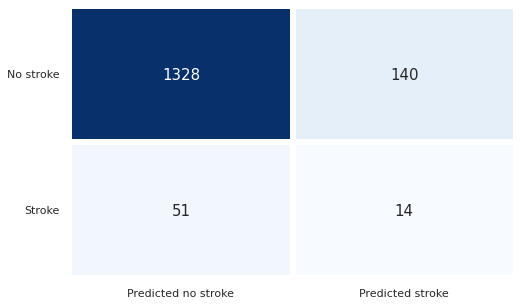

In [ ]:
classifier_dt = DecisionTreeClassifier(random_state=0)
classifier_dt.fit(X_train_res, y_train_res)
y_pred = classifier_dt.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

## **Model training and evaluation: Random Forest**
**Random forest** is a machine learning technique that’s used to solve regression and classification problems. It utilizes ensemble learning, which is a technique that combines many classifiers to provide solutions to complex problems. A random forest algorithm consists of many decision trees. The ‘forest’ generated by the random forest algorithm is trained through bagging or bootstrap aggregating. Bagging is an ensemble meta-algorithm that improves the accuracy of machine learning algorithms.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1468
           1       0.16      0.14      0.15        65

    accuracy                           0.93      1533
   macro avg       0.56      0.55      0.56      1533
weighted avg       0.93      0.93      0.93      1533

Accuracy Score:  0.9315068493150684


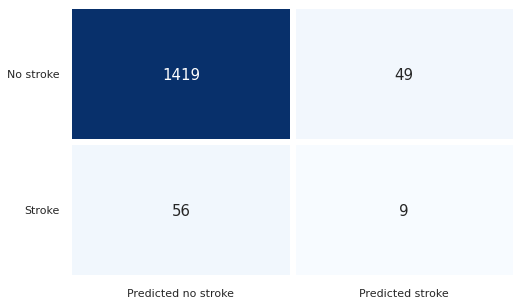

In [ ]:
classifier_rf = RandomForestClassifier(random_state=0)
classifier_rf.fit(X_train_res, y_train_res)
y_pred = classifier_rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

# **Tuning the Models**
In this section, the GridSearch Model is used to fine-tune and test the accuracy 

The test results are as follows:
* Logistics Regression = 78.34%
* Kneightbors = 92.15%
* SVC = 85.82%
* Decision Tree = 91.29%
* Randrom Forest = 96.63%
* Stochastic Gradient Descent = 77.38%


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_models = [(LogisticRegression(),[{'C':[0.25,0.5,0.75,1],'random_state':[0]}]), 
               (KNeighborsClassifier(),[{'n_neighbors':[5,7,8,10], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}]), 
               (SVC(),[{'C':[0.25,0.5,0.75,1],'kernel':['linear', 'rbf'],'random_state':[0]}]), 
               (DecisionTreeClassifier(),[{'criterion':['gini','entropy'],'random_state':[0]}]), 
               (RandomForestClassifier(),[{'n_estimators':[100,150,200],'criterion':['gini','entropy'],'random_state':[0]}]), 
               (SGDClassifier(),[{}])]

In [ ]:
for i,j in grid_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy',cv = 10)
    grid.fit(X_train_res, y_train_res)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print('{}:\nBest Accuracy : {:.2f}%'.format(i,best_accuracy*100))
    print('Best Parameters : ',best_param)
    print('')
    print('----------------')
    print('')

LogisticRegression():
Best Accuracy : 78.34%
Best Parameters :  {'C': 0.25, 'random_state': 0}

----------------

KNeighborsClassifier():
Best Accuracy : 92.15%
Best Parameters :  {'metric': 'manhattan', 'n_neighbors': 5}

----------------

SVC():
Best Accuracy : 85.82%
Best Parameters :  {'C': 1, 'kernel': 'rbf', 'random_state': 0}

----------------

DecisionTreeClassifier():
Best Accuracy : 91.29%
Best Parameters :  {'criterion': 'entropy', 'random_state': 0}

----------------

RandomForestClassifier():
Best Accuracy : 96.63%
Best Parameters :  {'criterion': 'entropy', 'n_estimators': 150, 'random_state': 0}

----------------

SGDClassifier():
Best Accuracy : 77.38%
Best Parameters :  {}

----------------



# **Keras Artificial neural network**
**Keras** is a high-level API that works with the backends Tensorflow, Theano, and CNTK. It includes a good and user-friendly API for implementing neural network tests. It’s also capable of running on both CPUs as well as GPUs.Keras comes with 10 different neural network modelling and training API modules. Let’s take a look at a few of them one by one.

**Keras** is a Python library including an API for working with neural networks and deep learning frameworks. Keras includes Python-based methods and components for working with various Deep Learning applications.

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.regularizers import l2

In [ ]:
def ann_classifier():
    ann = tf.keras.models.Sequential()
    ann.add(tf.keras.layers.Dense(units= 8, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu'))
    ann.add(tf.keras.layers.Dense(units= 8, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu'))
    tf.keras.layers.Dropout(0.6)
    ann.add(tf.keras.layers.Dense(units= 1, activation='sigmoid'))
    ann.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])
    return ann

In [ ]:
ann = KerasClassifier(build_fn = ann_classifier, batch_size = 32, epochs = 50)

## **Evaluating the Artificial neural network (Cross Validation)**

**Cross validation**

It is an experimental method of dividing the data to help select the most suitable parameters of each model. In this way, it's a more comprehensive trial than just splitting the practice and test sets. Usually there are multiple data sets such as 5 sets or 10 sets etc.


It is also open to use with Experimenting with automating parameters such as GridSearch will save experimenters more time in programming.

Training set data is normally used to divide to select parameters, once the appropriate parameters are obtained, it will be used to train the model by training with all test set data for further implementation.

<img src="https://scikit-learn.org/stable/_images/grid_search_workflow.png" width=400/>




<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" width=500/>

In [ ]:
accuracies = cross_val_score(estimator = ann, X = X_train_res, y = y_train_res, cv = 5)

Epoch 1/50
170/170 [==============================] - 1s 2ms/step - loss: 0.8283 - accuracy: 0.5403
Epoch 2/50
170/170 [==============================] - 0s 2ms/step - loss: 0.7181 - accuracy: 0.6699
Epoch 3/50
170/170 [==============================] - 0s 2ms/step - loss: 0.5841 - accuracy: 0.7662
Epoch 4/50
170/170 [==============================] - 0s 2ms/step - loss: 0.5095 - accuracy: 0.8088
Epoch 5/50
170/170 [==============================] - 0s 2ms/step - loss: 0.4883 - accuracy: 0.8147
Epoch 6/50
170/170 [==============================] - 0s 2ms/step - loss: 0.4792 - accuracy: 0.8158
Epoch 7/50
170/170 [==============================] - 0s 2ms/step - loss: 0.4723 - accuracy: 0.8156
Epoch 8/50
170/170 [==============================] - 0s 2ms/step - loss: 0.4685 - accuracy: 0.8145
Epoch 9/50
170/170 [==============================] - 0s 2ms/step - loss: 0.4644 - accuracy: 0.8152
Epoch 10/50
170/170 [==============================] - 0s 2ms/step - loss: 0.4622 - accuracy: 0.8178

In [ ]:
# Checking the mean and standard deviation of the accuracies obtained
mean = accuracies.mean()
std_deviation = accuracies.std()
print("Accuracy: {:.2f} %".format(mean*100))
print("Standard Deviation: {:.2f} %".format(std_deviation*100))

Accuracy: 73.58 %
Standard Deviation: 4.88 %


Model Accuracy Test, cv = 5, Accuracy is only 72.18%.

## **Tuning the Artificial neural network**

**GridSearch** is a tuning technique that attempts to compute the optimum values of hyperparameters. It is an exhaustive search that is performed on a the specific parameter values of a model. The model is also known as an estimator. Systematic parameter valuation. A simple method is to assign the value of each parameter we want to test and then run the model on every possible set of parameters by capturing every parameter. Parameters are trained and the trainee has to pre-select the optimal value, which if the best value is not in the selected group then the model will fail to find the best parameter.

Grid Search method for Tuning the Artificial neural network
From the original 72.18% to Accuracy: 77.00 % 

In [ ]:
# Builing the function
def ann_classifier(optimizer = 'adam'):
    ann = tf.keras.models.Sequential()
    ann.add(tf.keras.layers.Dense(units= 8, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu'))
    ann.add(tf.keras.layers.Dense(units= 8, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu'))
    tf.keras.layers.Dropout(0.6)
    ann.add(tf.keras.layers.Dense(units= 1, activation='sigmoid'))
    ann.compile(optimizer= optimizer, loss= 'binary_crossentropy', metrics= ['accuracy'])
    return ann

In [ ]:
# Passing values to KerasClassifier 
ann = KerasClassifier(build_fn = ann_classifier, batch_size = 32, epochs = 50)

In [ ]:
# Using Grid Search CV to getting the best parameters
parameters = {'batch_size': [25, 32],
             'epochs': [50, 100, 150],
             'optimizer': ['adam', 'rmsprop']}

grid_search = GridSearchCV(estimator = ann, param_grid = parameters, scoring = 'accuracy', cv = 5, n_jobs = -1)

grid_search.fit(X_train_res, y_train_res)

Epoch 1/150
272/272 [==============================] - 1s 2ms/step - loss: 0.7626 - accuracy: 0.6477
Epoch 2/150
272/272 [==============================] - 0s 2ms/step - loss: 0.6098 - accuracy: 0.7654
Epoch 3/150
272/272 [==============================] - 0s 2ms/step - loss: 0.5427 - accuracy: 0.7844
Epoch 4/150
272/272 [==============================] - 1s 2ms/step - loss: 0.5227 - accuracy: 0.7874
Epoch 5/150
272/272 [==============================] - 1s 2ms/step - loss: 0.5120 - accuracy: 0.7905
Epoch 6/150
272/272 [==============================] - 1s 2ms/step - loss: 0.5049 - accuracy: 0.7893
Epoch 7/150
272/272 [==============================] - 1s 2ms/step - loss: 0.4991 - accuracy: 0.7907
Epoch 8/150
272/272 [==============================] - 0s 2ms/step - loss: 0.4940 - accuracy: 0.7905
Epoch 9/150
272/272 [==============================] - 0s 2ms/step - loss: 0.4907 - accuracy: 0.7909
Epoch 10/150
272/272 [==============================] - 1s 2ms/step - loss: 0.4875 - accura

GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f45a317be90>,
             n_jobs=-1,
             param_grid={'batch_size': [25, 32], 'epochs': [50, 100, 150],
                         'optimizer': ['adam', 'rmsprop']},
             scoring='accuracy')

In [ ]:
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 76.28 %
Best Parameters: {'batch_size': 25, 'epochs': 150, 'optimizer': 'rmsprop'}


 Using the Grid Search to obtain optimal hyperparameters for a machine learning model.

## **Artificial neural network model after Tuning**

In [ ]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units= 32, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu'))
ann.add(tf.keras.layers.Dense(units= 32, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu'))
tf.keras.layers.Dropout(0.6)
ann.add(tf.keras.layers.Dense(units= 1, activation='sigmoid'))
ann.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

In [ ]:
ann_history = ann.fit(X_train_res, y_train_res, batch_size= 25, epochs= 150, validation_split= 0.2)

Epoch 1/150
218/218 [==============================] - 2s 4ms/step - loss: 0.8089 - accuracy: 0.7237 - val_loss: 0.7504 - val_accuracy: 0.7393
Epoch 2/150
218/218 [==============================] - 1s 3ms/step - loss: 0.5571 - accuracy: 0.7880 - val_loss: 0.7062 - val_accuracy: 0.7187
Epoch 3/150
218/218 [==============================] - 1s 3ms/step - loss: 0.5087 - accuracy: 0.7870 - val_loss: 0.6727 - val_accuracy: 0.7297
Epoch 4/150
218/218 [==============================] - 1s 3ms/step - loss: 0.4911 - accuracy: 0.7887 - val_loss: 0.5934 - val_accuracy: 0.7894
Epoch 5/150
218/218 [==============================] - 1s 3ms/step - loss: 0.4819 - accuracy: 0.7898 - val_loss: 0.5986 - val_accuracy: 0.7813
Epoch 6/150
218/218 [==============================] - 1s 3ms/step - loss: 0.4760 - accuracy: 0.7889 - val_loss: 0.6403 - val_accuracy: 0.7401
Epoch 7/150
218/218 [==============================] - 1s 3ms/step - loss: 0.4718 - accuracy: 0.7913 - val_loss: 0.6342 - val_accuracy: 0.7474

**Loss Graph**

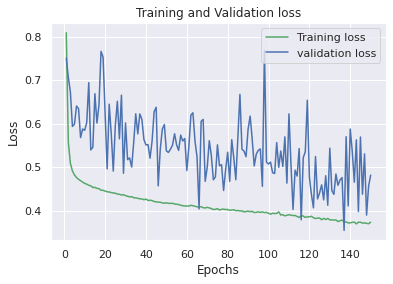

In [ ]:
loss_train = ann_history.history['loss']
loss_val = ann_history.history['val_loss']
epochs = range(1,151)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Accuracy Graph**

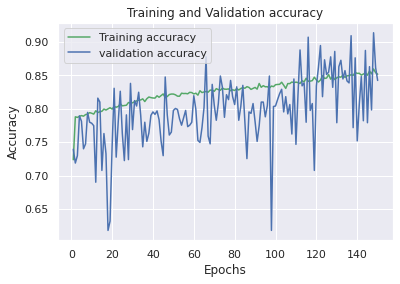

In [ ]:
loss_train = ann_history.history['accuracy']
loss_val = ann_history.history['val_accuracy']
epochs = range(1,151)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1475
           1       0.14      0.16      0.15        58

    accuracy                           0.93      1533
   macro avg       0.55      0.56      0.56      1533
weighted avg       0.94      0.93      0.93      1533

Accuracy Score:  0.9315068493150684


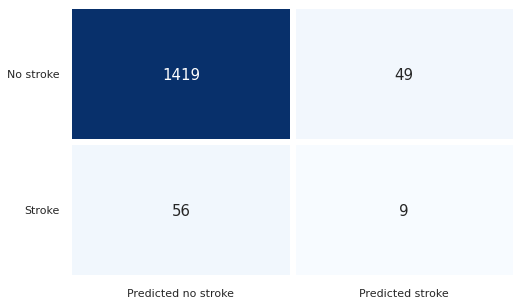

In [ ]:

cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_pred,y_test))
print('Accuracy Score: ',accuracy_score(y_pred,y_test))

# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()



<img src="https://miro.medium.com/max/1400/1*GPrgyxOQDoKwTW8_AreUjQ.png" width=600/>

*  True Positives (TP): when the actual value is Positive and predicted is also Positive.

*  True negatives (TN): when the actual value is Negative and prediction is also Negative.

*  False positives (FP): When the actual is negative but prediction is Positive. Also known as the Type 1 error

*  False negatives (FN): When the actual is Positive but the prediction is Negative. Also known as the Type 2 error

Where TP, TN, FP, FN in the table are represented by the frequency values,

we can use the Confusion Matrix to calculate the estimation of the performance of our model prediction in the form of several values:

**Accuracy (accuracy we predict matches what actually happened)**

Accuracy = (TPs + TNs) / (TPs+TNs+FPs + FNs) = 93.15 %

**Precision**
Comparing between the prediction as when the actual value is true and predicted is also true -> True Positives (TP) with When the actual is true but the prediction is false -> False positives (FP)

Precision = TPs / (TPs + FPs) = 0.97

**Recall** is defined as the ratio of the total number of correctly classified positive classes divide by the total number of positive classes. Or, out of all the positive classes, how much we have predicted correctly. Recall should be high(ideally 1). 

Recall is a useful metric in cases where False Negative (FN) trumps False Positive (FP)

Recall = TPs/(TPs+FNs) = 0.96


**F1-Score** is a number between 0 and 1 and is the harmonic mean of precision and recall. We use harmonic mean because it is not sensitive to extremely large values, unlike simple averages.

F1 score sort of maintains a balance between the precision and recall for your classifier. If your precision is low, the F1 is low and if the recall is low again your F1 score is low.


F1 = 2 x (Precision x Recall)/(Precision + Recall) = 0.96
